# Imports

In [178]:
from gaussianNB import GaussianNB
import pandas as pd
import numpy as np
# from math import sqrt, pi, exp
from sklearn.model_selection import train_test_split
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing as preprocessing

In [179]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [180]:
np.random.seed(42)

# Downloading the dataset

1. One way I found to dowload the dataset was by retrieving it directly using a URL.

``` python
from urllib.request import urlretrieve
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris)
df = pd.read_csv(iris, sep=',')
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes 
```

2. The second way *that I used* was to dowlnoad the dataset as a .csv from an online site; as it was a small dataset 4 KB. Then I saved it in the repo file as **iris_dataset.csv**

# Dataset Statistics and Description

1. First, I read the dataset using panadas to be saved as a dataframe.

In [181]:
iris = pd.read_csv('iris_dataset.csv')

2. Some preliminary exploration of the dataset

In [182]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [183]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


From the info: 
* There was no missing or null instances. 
* **150** instances in total. 
* All features **(4)** are type float: *(sepal_length, sepal_width, petal_length, petal_width)*       
* Class type is string.

In [184]:
iris['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

From counts of unique values:
* There are **3** classes: *(setosa, versicolor, virginica)*
* Instances are equally distributed among them, each has **50 instances**. 
* No need for stratified sampling as dataset distribution is balanced. 

In [185]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From the description summary:
* The features don't have the same mean or std (not the same distributions).
* They don't have the same range of values as well.

## Features Descriptions

### Feature plots

#### Plotting each feature distribution on its own. (marginal)

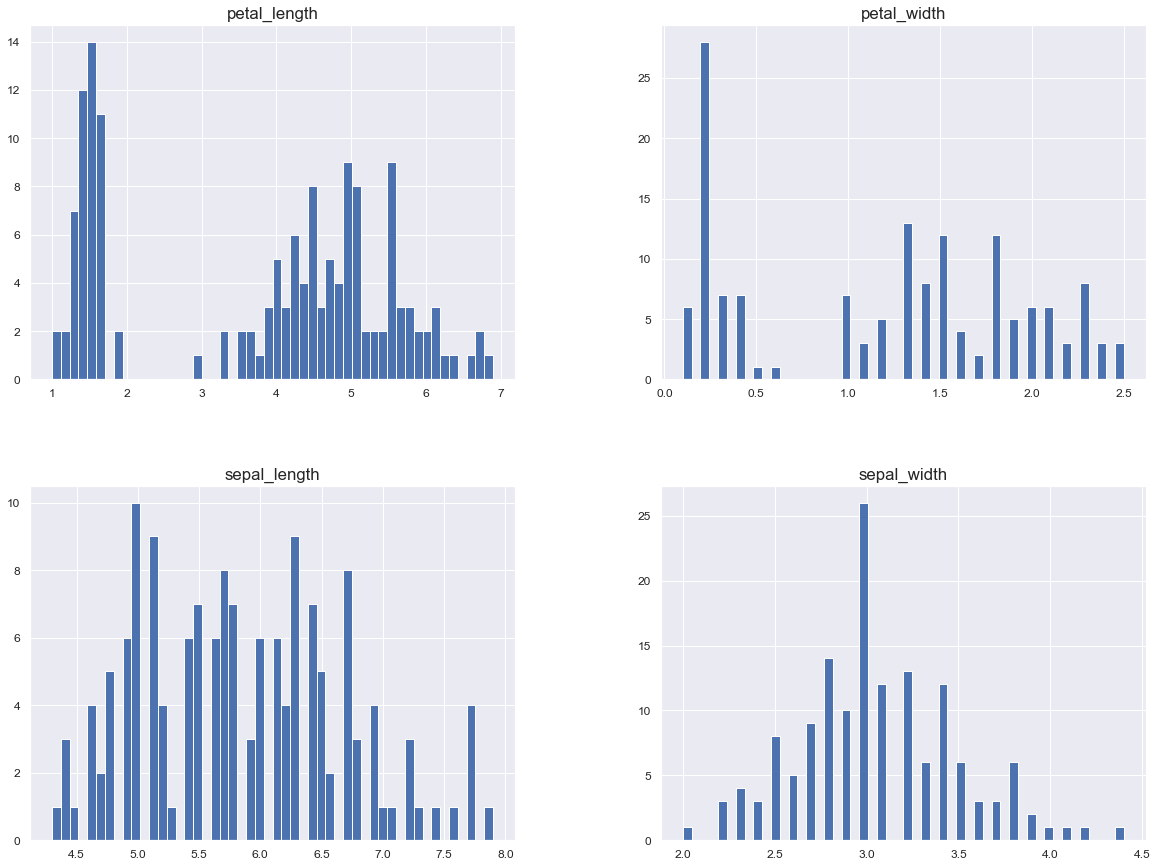

In [186]:
iris.hist(bins=50, figsize=(20,15))
plt.show()

**Correlation between features**

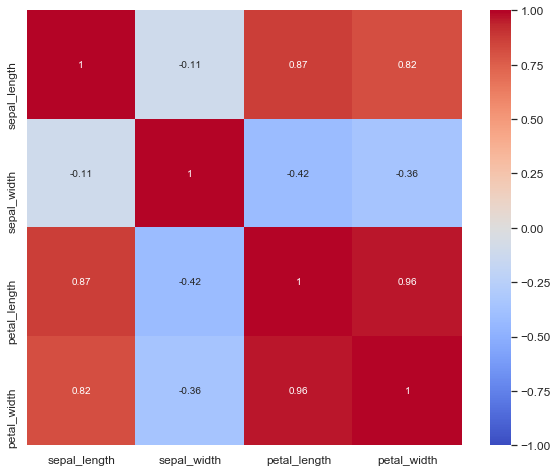

In [187]:
f, ax = plt.subplots(figsize=(10, 8))
corr = iris.corr()
sns.heatmap(corr, annot = True, cmap= 'coolwarm',
            square=True, ax=ax,  vmin=-1, vmax=1, center= 0)

* Very high correlation between petal length and petal width. 
* Also high correlation between petal length and sepal length, petal width and sepal length

**Plot between each two features to see the relationships**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


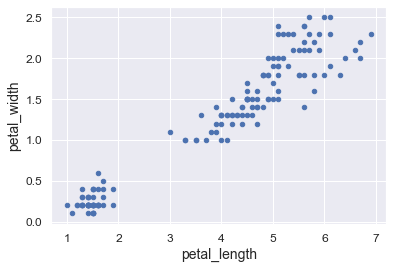

In [188]:
iris.plot(kind="scatter", x="petal_length", y="petal_width")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


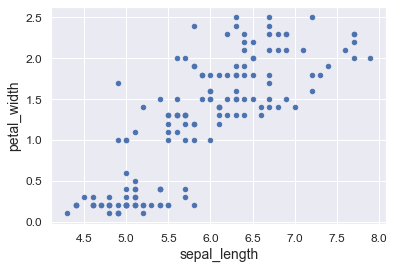

In [189]:
iris.plot(kind="scatter", x="sepal_length", y="petal_width")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F884887F0>,
      dtype=object)

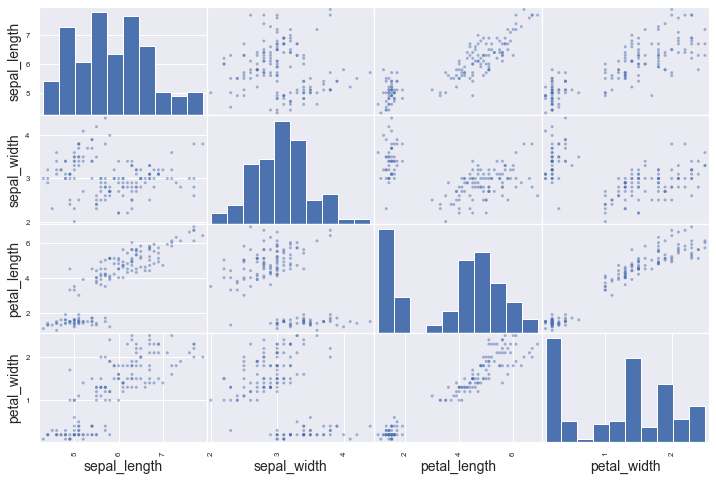

In [190]:
attributes = ['sepal_length','sepal_width','petal_length','petal_width']
scatter_matrix(iris[attributes], figsize=(12, 8))

#### Plotting the conditional distribution of each feature. 

$$P(feature|class)$$

Grouping the dataset according to 'species' i.e. the target class to plot the conditional distribution.

In [191]:
grouped = iris.groupby(iris['species'])

In [192]:
for name, group in grouped:
    print(name)

setosa
versicolor
virginica


To look at one of the groups dataframe

In [193]:
grouped.get_group('setosa').head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### Class 1 SETOSA

$$P(feature|class = SETOSA)$$

<function matplotlib.pyplot.show(*args, **kw)>

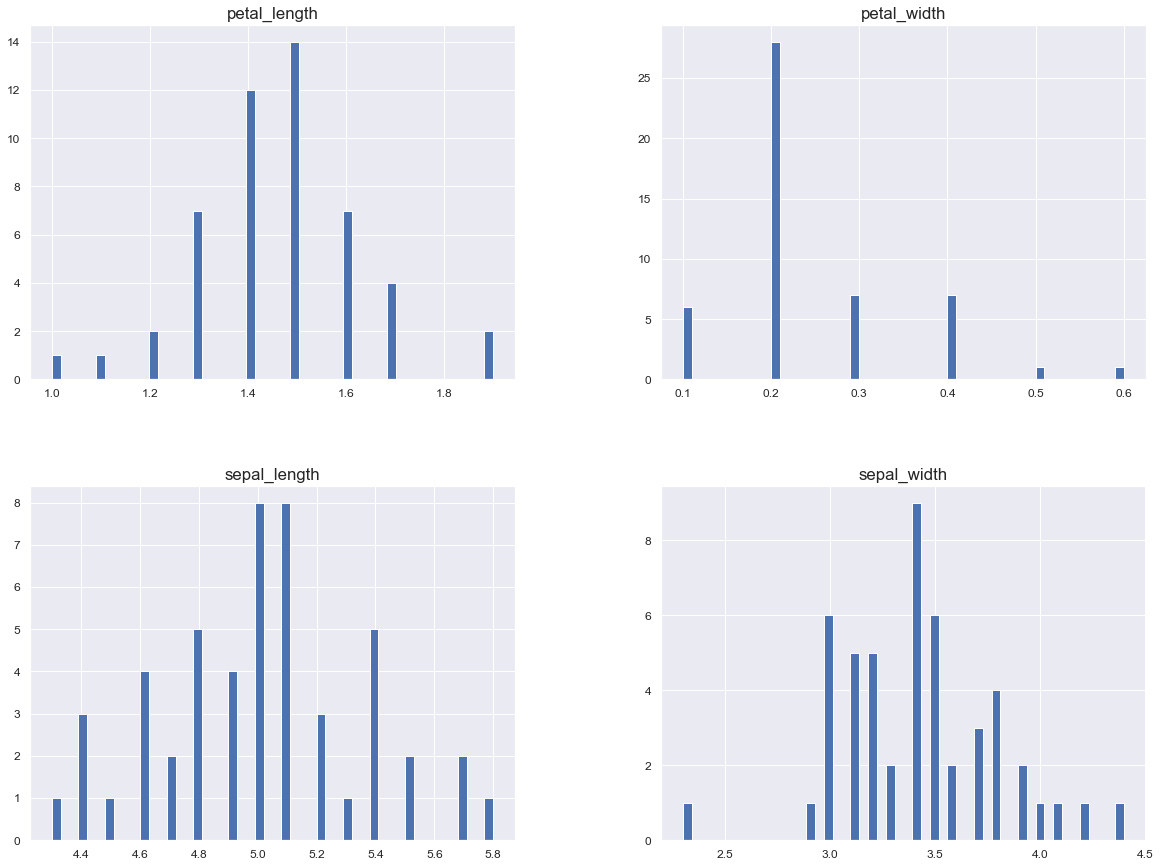

In [194]:
setosa_dist = grouped.get_group('setosa')
setosa_dist.hist(bins=50, figsize=(20,15))
plt.show

**Correlation between features conditional on class setosa**

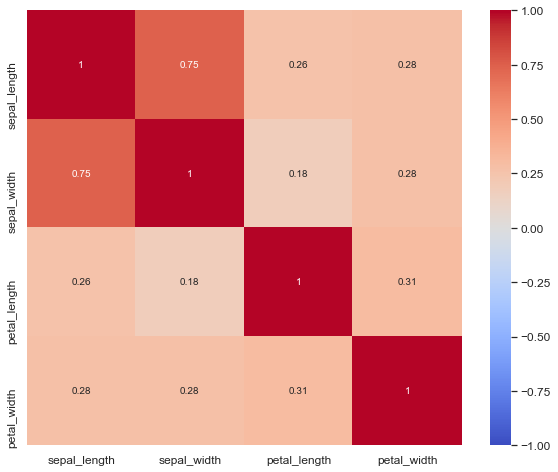

In [195]:
f, ax = plt.subplots(figsize=(10, 8))
corr_s = setosa_dist.corr()
sns.heatmap(corr_s, annot = True, cmap= 'coolwarm',
            square=True, ax=ax,  vmin=-1, vmax=1, center= 0)

* Very low correlation between features....can be assumed to be conditionally independent. (Naibe Bayes assumption)
* Somewhat high correlation between sepal_width and sepal_length
* **Note that the correlation between the conditional distributions of features is much different from that between the marginal distributions of features as seen in 3.1.1.1**

##### Class 2 VERSICOLOR

$$P(feature|class = VERSICOLOR)$$

<function matplotlib.pyplot.show(*args, **kw)>

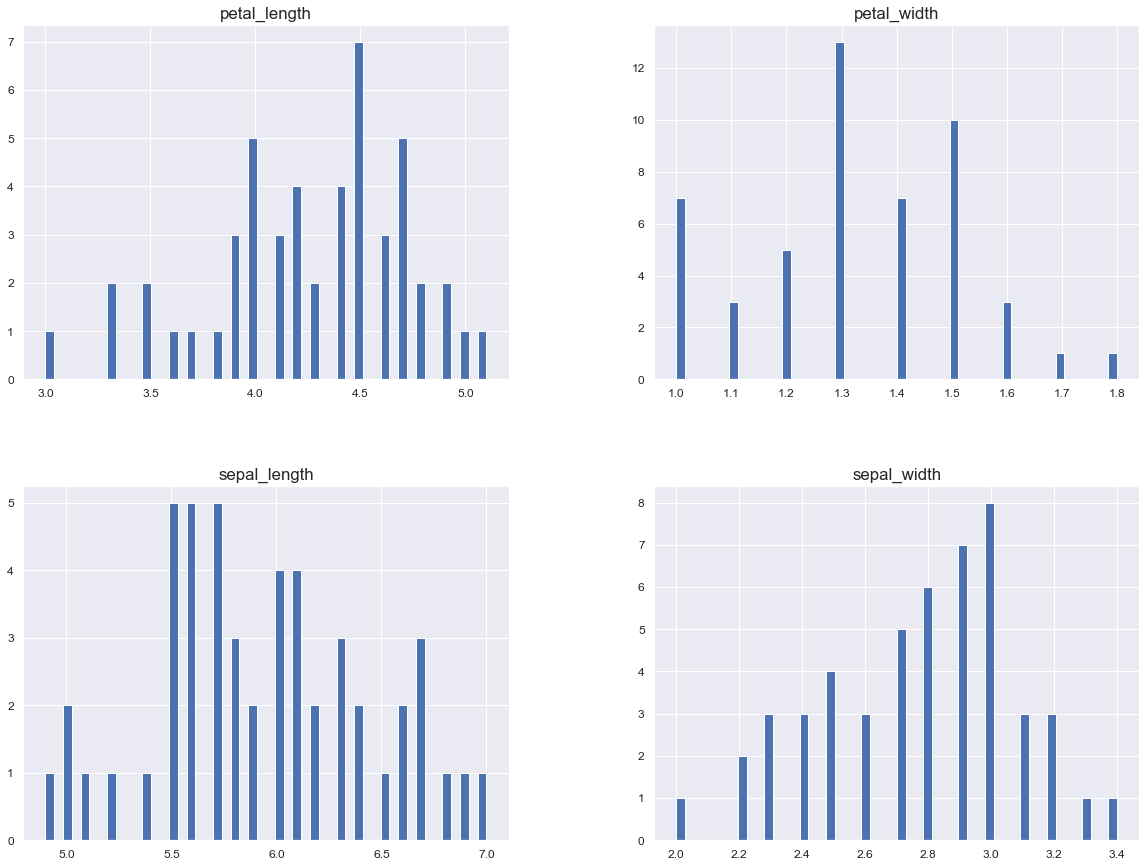

In [196]:
versicolor_dist = grouped.get_group('versicolor')
versicolor_dist.hist(bins=50, figsize=(20,15))
plt.show

**Correlation between features conditional on class versicolor**

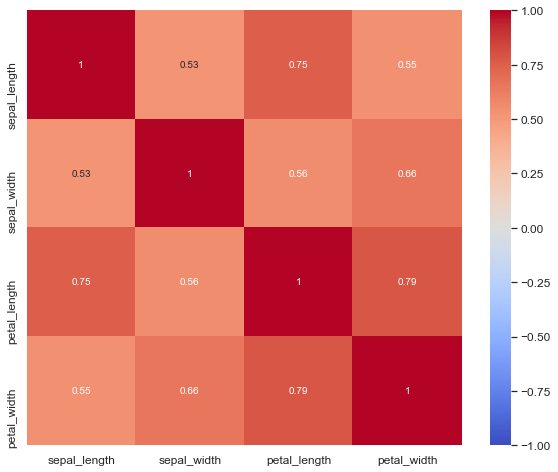

In [197]:
f, ax = plt.subplots(figsize=(10, 8))
corr_v = versicolor_dist.corr()
sns.heatmap(corr_v, annot = True, cmap= 'coolwarm',
            square=True, ax=ax,  vmin=-1, vmax=1, center= 0)

* Still somewhat low correlation between features....can be assumed to be conditionally independent. (Naibe Bayes assumption)
* Somewhat high correlation between petal_width and petal_length.
* **Note that the correlation between the conditional distributions of features is much different from that between the marginal distributions of features as seen in 3.1.1.1**

##### Class 3 VIRGINICA

$$P(feature|class = VIRGINICA)$$

<function matplotlib.pyplot.show(*args, **kw)>

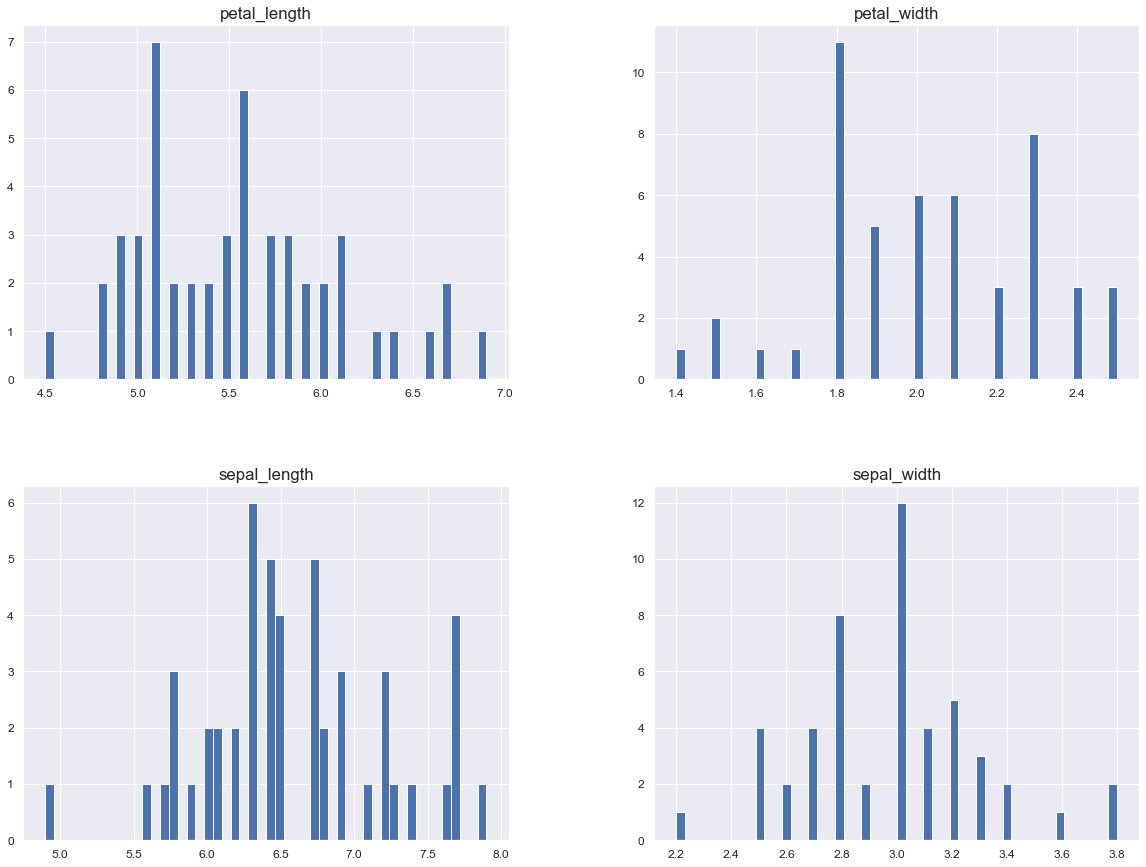

In [198]:
virginica_dist = grouped.get_group('virginica') 
virginica_dist.hist(bins=50, figsize=(20,15))
plt.show

**Correlation between features conditional on class virginica**

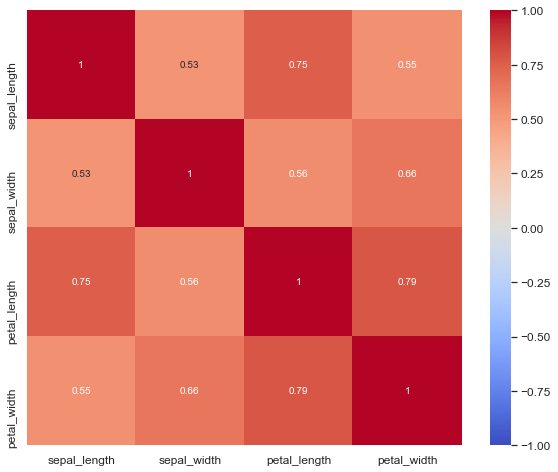

In [199]:
f, ax = plt.subplots(figsize=(10, 8))
corr_vir = versicolor_dist.corr()
sns.heatmap(corr_vir, annot = True, cmap= 'coolwarm',
            square=True, ax=ax,  vmin=-1, vmax=1, center= 0)

* Still somewhat low correlation between features....can be assumed to be conditionally independent. (Naibe Bayes assumption)
* Somewhat high correlation between petal_width and petal_length.
* **Note that the correlation between the conditional distributions of features is much different from that between the marginal distributions of features as seen in 3.1.1.1**

**Plotting all features against eachother**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F89B17A90>,
      dtype=object)

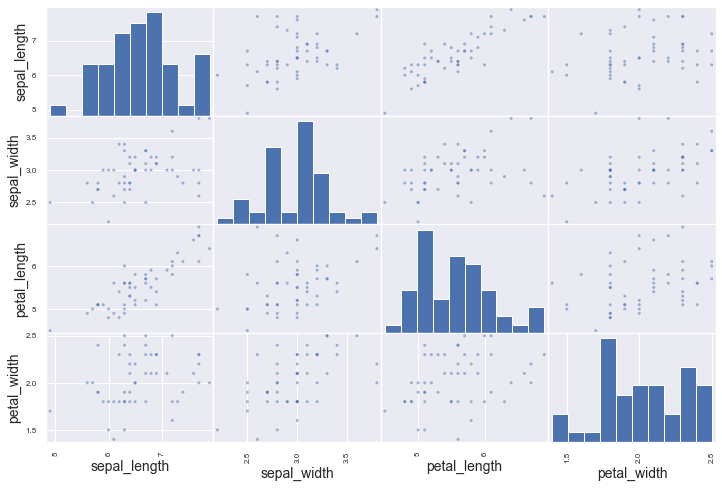

In [200]:
scatter_matrix(virginica_dist[attributes], figsize=(12, 8))

* I chose to only plot all features against eachother in the conditional distributions once just for visualization but it seems there is **very low correlation** between features and our Naive Bayes assumption to be correct.
* The features are **conditionally independent**.

## Preprocessing

**For the preprocessing steps, some of what can be done is:**
* Scale the features distribution.
* Convert the features distribution to gaussian to align with our second assumption for Naive Bayes that they are normally distributed.
* Encode the target classes to convert from string to integer.

### Features

#### Scaling to mean 0 and std 1

In [201]:
scaler = preprocessing.StandardScaler().fit(iris[attributes])
scaled_data = scaler.transform(iris[attributes])

In [202]:
df_scaled = pd.DataFrame(scaled_data)
df_scaled.columns = [attributes]
df_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


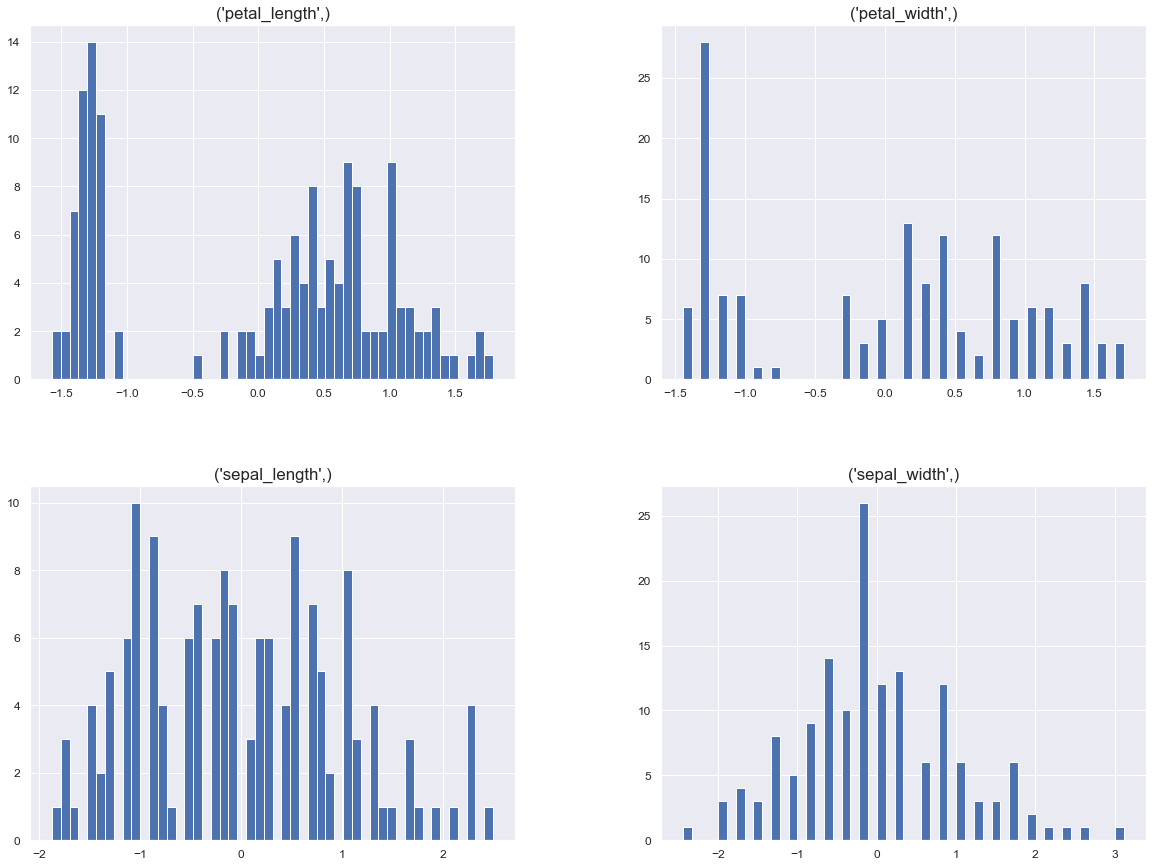

In [203]:
df_scaled.hist(bins=50, figsize=(20,15))
plt.show()

* From the plots it appears that after the scaling they all have an approximate mean of 0 and std of 1 and they have the same range of values

#### Converting to a gaussian distribution

* This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of outliers. This transform is non-linear.

In [204]:
gaussian_distrib = preprocessing.QuantileTransformer(n_quantiles=50, output_distribution='normal', random_state=42)

Calculate the transformed values (with the distribution conditional on each class)

In [205]:
gauss_features_setosa = pd.DataFrame(gaussian_distrib.fit_transform(setosa_dist[attributes]))
gauss_features_versicolor = pd.DataFrame(gaussian_distrib.fit_transform(versicolor_dist[attributes]))
gauss_features_virginica = pd.DataFrame(gaussian_distrib.fit_transform(virginica_dist[attributes]))

gauss_features_virginica.columns = [attributes]
gauss_features_versicolor.columns = [attributes]
gauss_features_setosa.columns = [attributes]

##### Plot the distribution of each feature given class

$$P(feature|class = SETOSA)$$

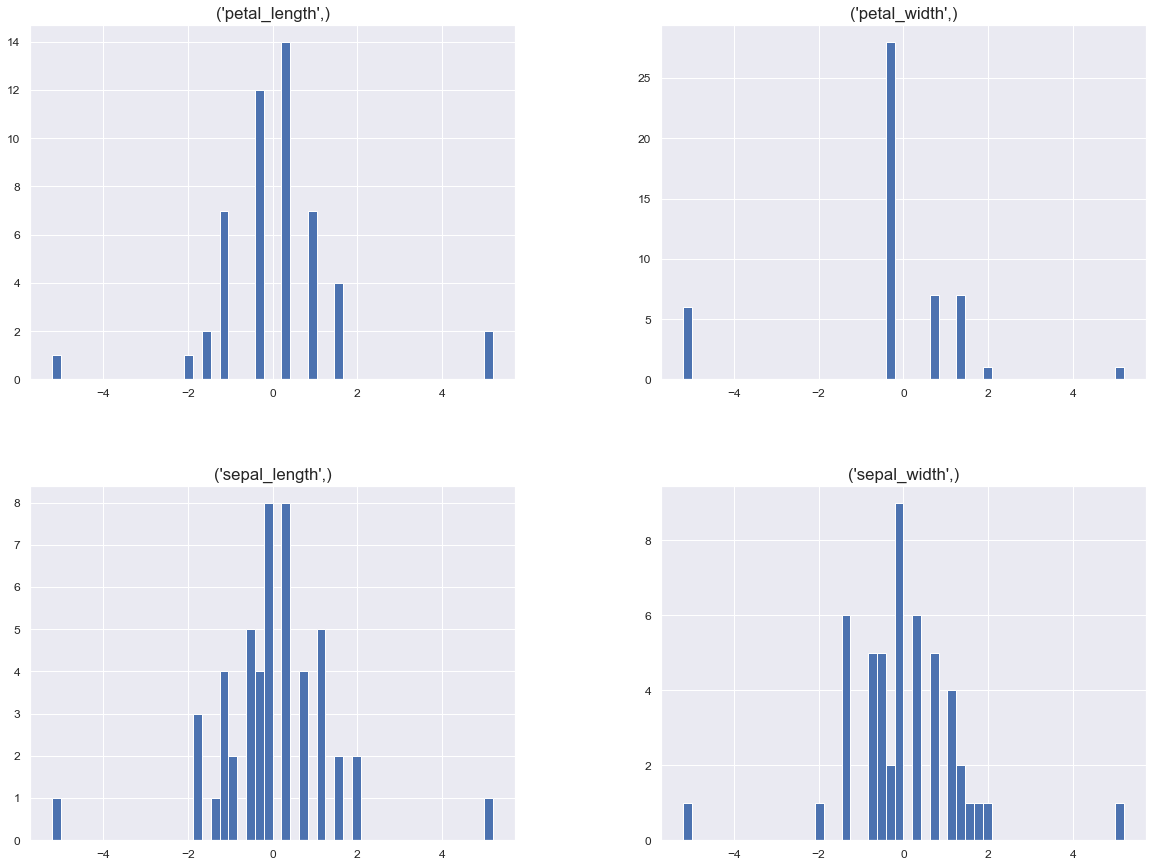

In [206]:
gauss_features_setosa.hist(bins=50, figsize=(20,15))
plt.show()

In [207]:
gauss_features_setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,0.011485,0.018800,0.075941,-0.349371
std,1.392842,1.392060,1.540911,2.039481
min,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.596232,-0.739847,-0.393598,-0.258633
50%,-0.051178,0.000000,0.258633,-0.258633
75%,0.690633,0.724606,0.740749,0.690633
max,5.199338,5.199338,5.199338,5.199338


$$P(feature|class = VIRGINICA)$$

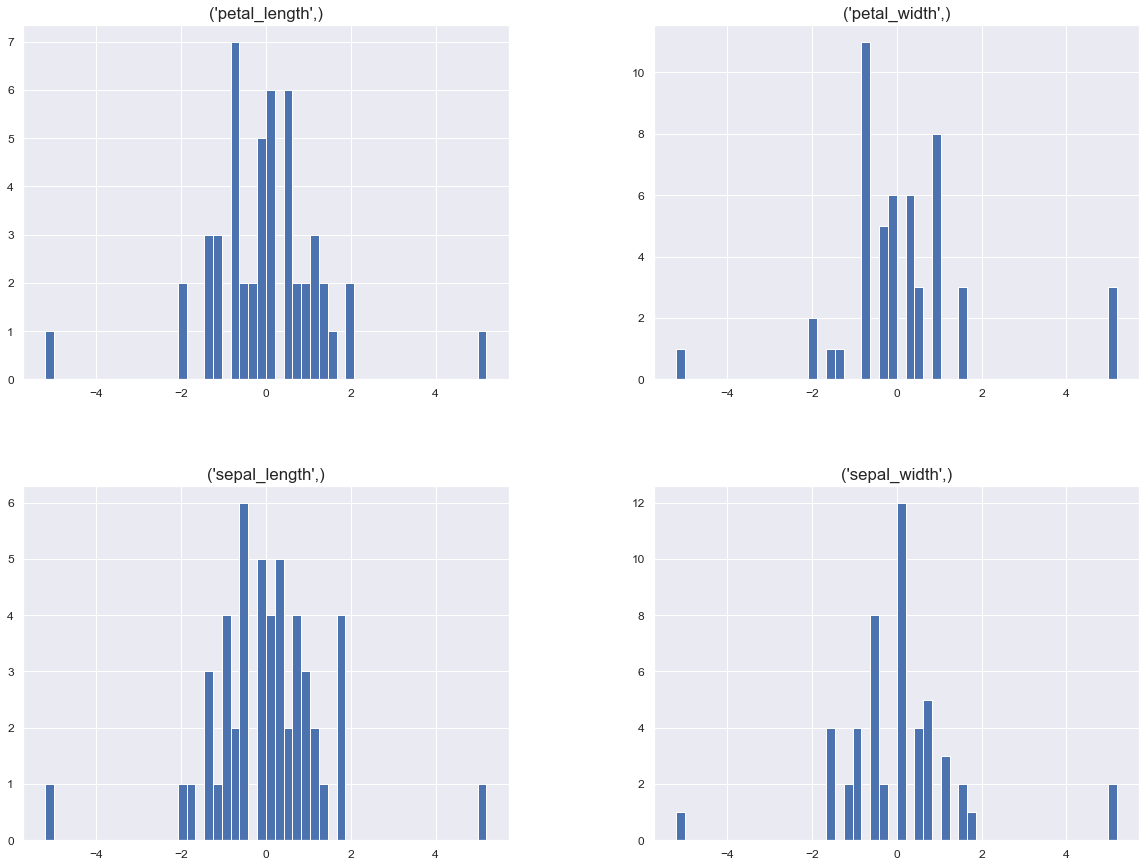

In [208]:
gauss_features_virginica.hist(bins=50, figsize=(20,15))
plt.show()

In [209]:
gauss_features_virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,0.013123,0.069803,0.005421,0.143063
std,1.400436,1.545427,1.392189,1.691691
min,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.654985,-0.536176,-0.690633,-0.827130
50%,0.051178,0.102491,0.038633,-0.051178
75%,0.658520,0.754392,0.684094,0.863696
max,5.199338,5.199338,5.199338,5.199338


$$P(feature|class = VERSICOLOR)$$

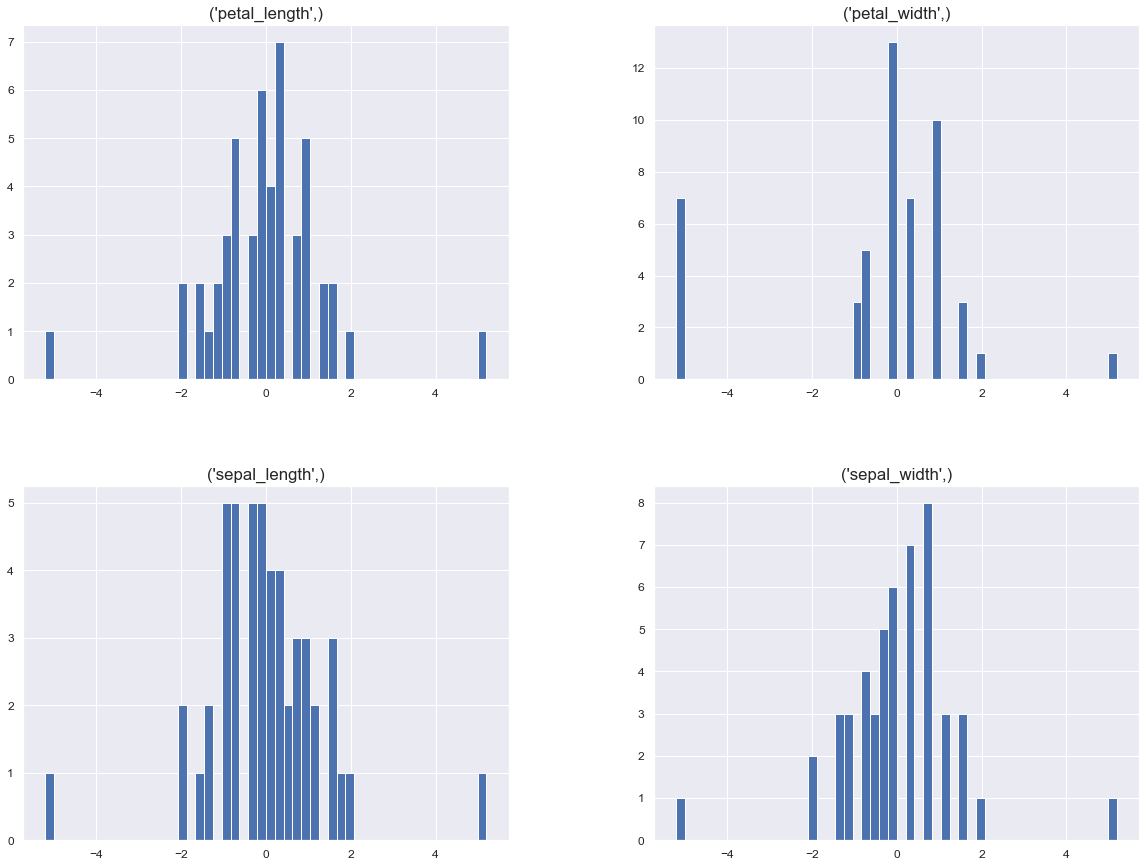

In [210]:
gauss_features_versicolor.hist(bins=50, figsize=(20,15))
plt.show()

In [211]:
gauss_features_versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,0.006932,0.008307,0.004135,-0.428698
std,1.398101,1.396110,1.395147,2.183832
min,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.627072,-0.735216,-0.627072,-0.658520
50%,0.000000,-0.051178,0.025656,-0.180012
75%,0.690633,0.723476,0.690633,0.901454
max,5.199338,5.199338,5.199338,5.199338


* **The conditional distributions are approximately gaussian for each feature and class**.
* The means are all close to zero with all features almost having the same range.

### Labels 

* This step is to encode the target variables from string to integer values.

In [212]:
classes = iris['species']
y = classes.copy()
classes.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

* The label encoder is used to encode the classes and transform the target values to integer ones.

In [213]:
targert_encoder = preprocessing.LabelEncoder()
targert_encoder.fit(classes)
y_encoded = targert_encoder.transform(y)
list(targert_encoder.classes_)
# list(target_encoder.inverse_transform([2, 2, 1]))
# list(target_encoder.inverse_transform([2, 2, 1]))

['setosa', 'versicolor', 'virginica']

* To add the encoded target column to the dataset

In [214]:
target = pd.DataFrame(y_encoded)
# target.head()

In [215]:
data = iris[attributes]
# data.head()

In [216]:
data['target'] = target

In [217]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Split Dataset

I decided not to use the preprocessed features (the gaussian transformed and the scaled) or the encoded labels. Because entering the raw data into the classifier gave a high enough accuracy. And the code for naive bayes groups the features by category regardless of whether the categories are integer or string so no need to use the encoding.

* Splits the dataset into train and test sets.

In [218]:
train_set, test_set = train_test_split(iris, test_size=0.2, random_state=42)

In [219]:
test_set['species'].value_counts(normalize=True) 

virginica     0.366667
setosa        0.333333
versicolor    0.300000
Name: species, dtype: float64

In [220]:
train_set['species'].value_counts(normalize=True) 

versicolor    0.341667
setosa        0.333333
virginica     0.325000
Name: species, dtype: float64

# Training

In [221]:
gaussian_classifier = GaussianNB()
means, std, classprior = gaussian_classifier.fit(train_set[attributes], train_set['species'])
classprior # to show the prior probabilities of the classes in the training set

{'setosa': 0.3333333333333333,
 'versicolor': 0.3416666666666667,
 'virginica': 0.325}

* The function to calculate the test accuracy

In [222]:
def accuracy (true, pred):
    return sum(pred == true)/float(len(true))*100

* To predict the unseen test data

In [223]:
y_pred = gaussian_classifier.predict(test_set[attributes])

In [224]:
y_true = test_set['species']

* **The test accuracy**

In [225]:
accuracy(y_true,y_pred)

100.0

* **The confusion matrix for the test set**

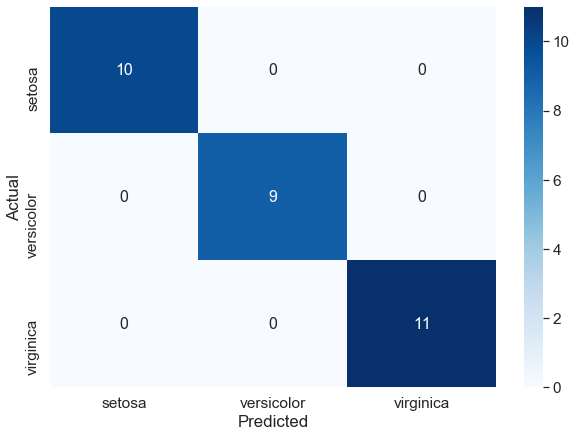

In [226]:
con_mat = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(con_mat, columns=np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size